In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
%%time
transactions = pd.read_csv('storage/transactions_train.csv')
articles = pd.read_csv('storage/articles.csv')
customers = pd.read_csv('storage/customers.csv')

CPU times: user 29.7 s, sys: 2.35 s, total: 32 s
Wall time: 32.4 s


****Total number of purchase by each customer****

In [3]:
%%time
purchase_count_per_customer = transactions.groupby('customer_id')['article_id'].count()

CPU times: user 9.31 s, sys: 129 ms, total: 9.43 s
Wall time: 9.43 s


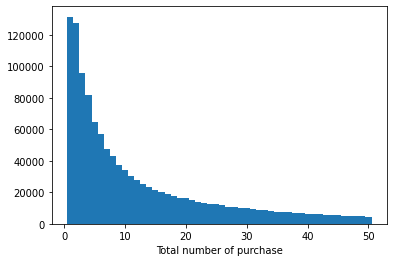

In [4]:
_ = plt.hist(purchase_count_per_customer,bins=50,range=(0.5,50.5),)
_ = plt.xlabel('Total number of purchase')

****Total number of unique purchase by each customer****

In [5]:
%%time
unique_purchase_count_per_customer = transactions.groupby('customer_id')['article_id'].apply(lambda x: len(set(x.tolist())))

CPU times: user 30.2 s, sys: 504 ms, total: 30.7 s
Wall time: 30.7 s


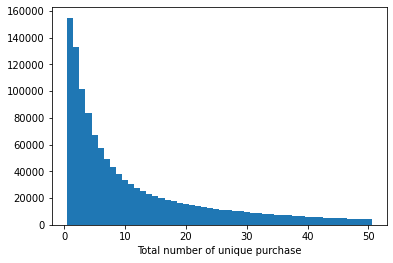

In [6]:
_ = plt.hist(unique_purchase_count_per_customer,bins=50,range=(0.5,50.5))
_ = plt.xlabel('Total number of unique purchase')

****Comparison of total number of purchase and total number of unique purchase by each customer****

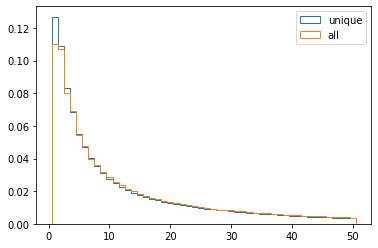

In [7]:
_ = plt.hist(unique_purchase_count_per_customer,bins=50,range=(0.5,50.5),density=1.,histtype='step',label='unique')
_ = plt.hist(purchase_count_per_customer,bins=50,range=(0.5,50.5),density=1.,histtype='step',label='all')
plt.legend(loc='best')

In [8]:
df_unique_purchase_count_per_customer = unique_purchase_count_per_customer.reset_index()
df_unique_purchase_count_per_customer.columns = ['customer_id','count']

df_purchase_count_per_customer = purchase_count_per_customer.reset_index()
df_purchase_count_per_customer.columns = ['customer_id','count']

df_merge = df_unique_purchase_count_per_customer.merge(df_purchase_count_per_customer,on='customer_id')

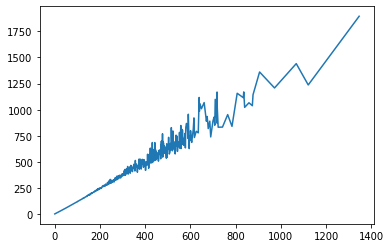

In [9]:
xy = df_merge.groupby('count_x')['count_y'].mean().dropna().reset_index()
_ = plt.plot(xy['count_x'],xy['count_y'])

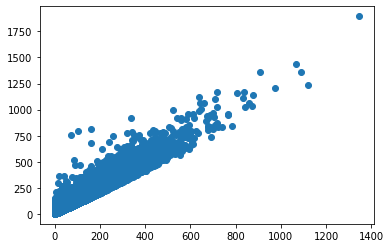

In [10]:
_ = plt.scatter(df_merge['count_x'],df_merge['count_y'])

**Percentage of customer who only buys unique items**

In [13]:
(df_merge['count_x']==df_merge['count_y']).sum() / len(df_merge)

0.5079245765007366

**Percentage of customer who buys repeated items**

In [15]:
(df_merge['count_x']*1.2<df_merge['count_y']).sum() / len(df_merge)

0.21329740339915187